## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [11]:
!pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.4 MB/s eta 0:00:00a 0:00:01


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

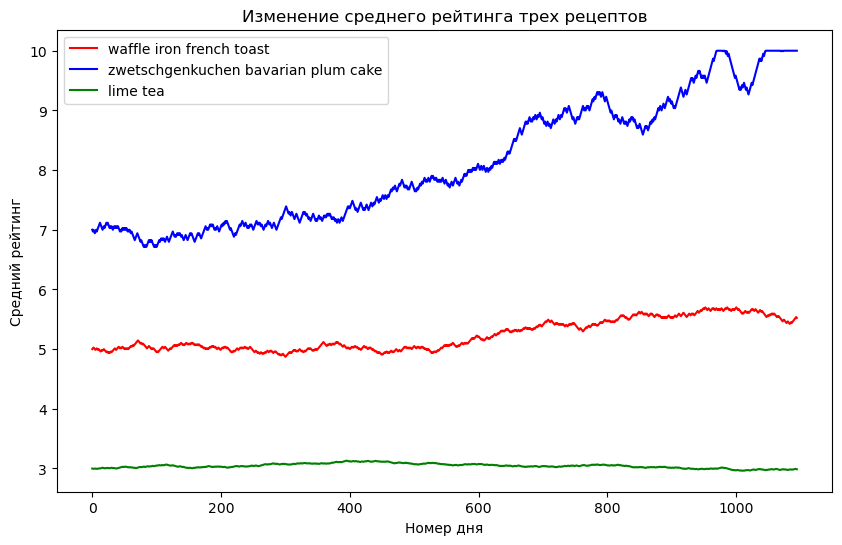

In [18]:
ratings = np.load('average_ratings.npy')

recipe_names = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake','lime tea']

plt.figure(figsize=(10, 6))
days = np.arange(ratings.shape[1])
for i in range(3):
    plt.plot(days, ratings[i], label=recipe_names[i], color=['red', 'blue', 'green'][i])

plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')
plt.legend()


plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


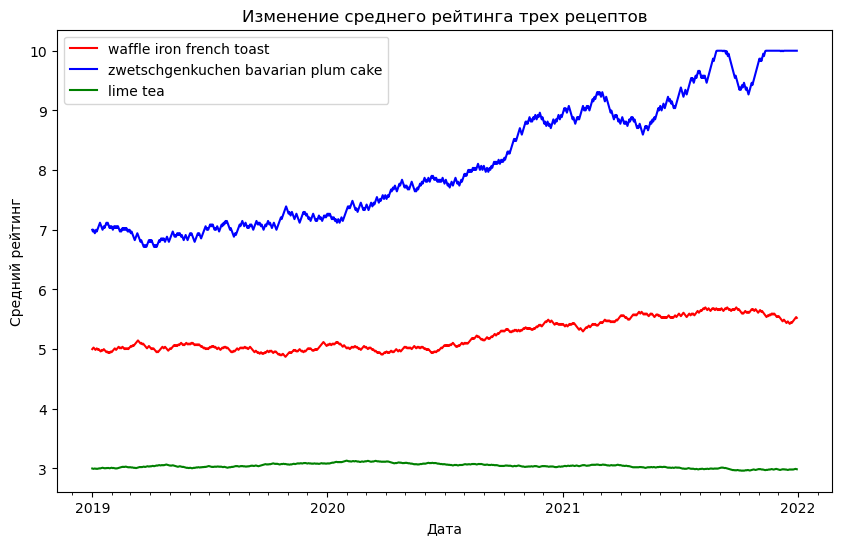

In [20]:
dates = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

plt.figure(figsize=(10, 6))

for i in range(3):
    plt.plot(dates, ratings[i], label=recipe_names[i], color=['red', 'blue', 'green'][i])


plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())

plt.legend()

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

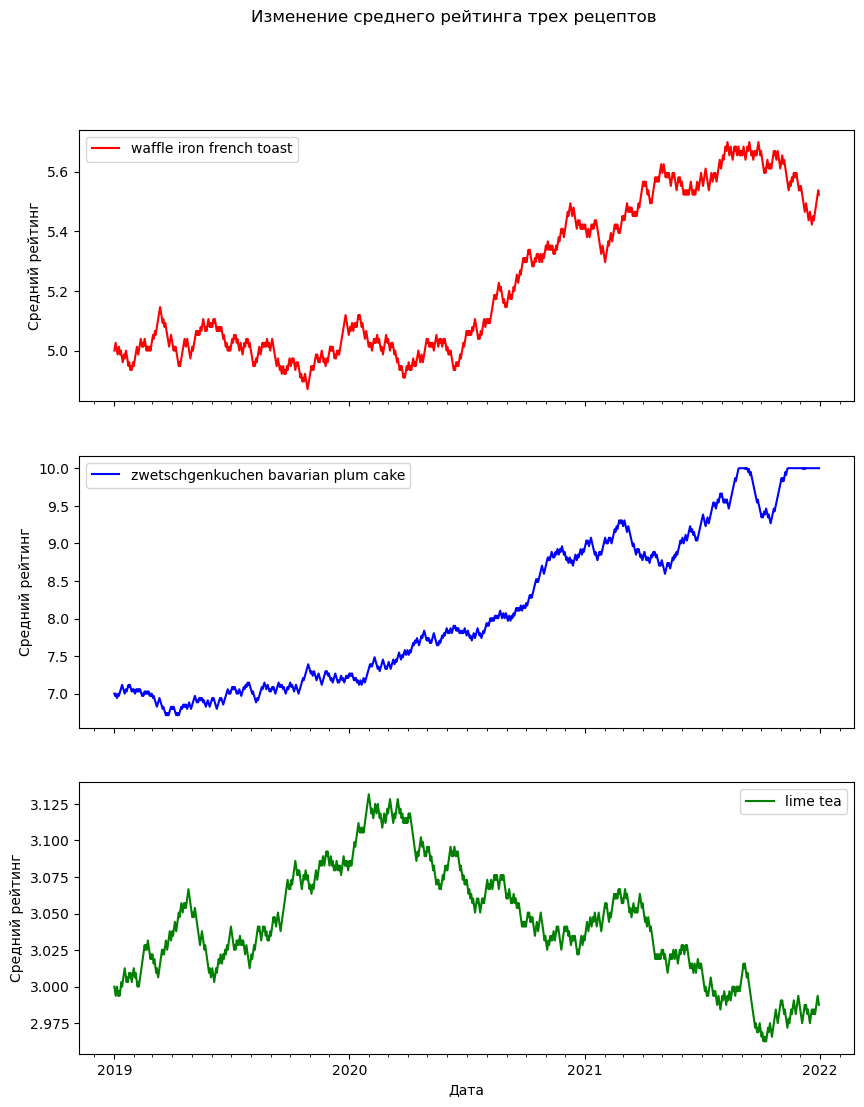

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


ax1.plot(dates, ratings[0], color='red', label=recipe_names[0])
ax2.plot(dates, ratings[1], color='blue', label=recipe_names[1])
ax3.plot(dates, ratings[2], color='green', label=recipe_names[2])

ax1.set_ylabel('Средний рейтинг')
ax2.set_ylabel('Средний рейтинг')
ax3.set_ylabel('Средний рейтинг')
ax3.set_xlabel('Дата')
fig.suptitle('Изменение среднего рейтинга трех рецептов')

ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())


ax1.legend()
ax2.legend()
ax3.legend()


plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


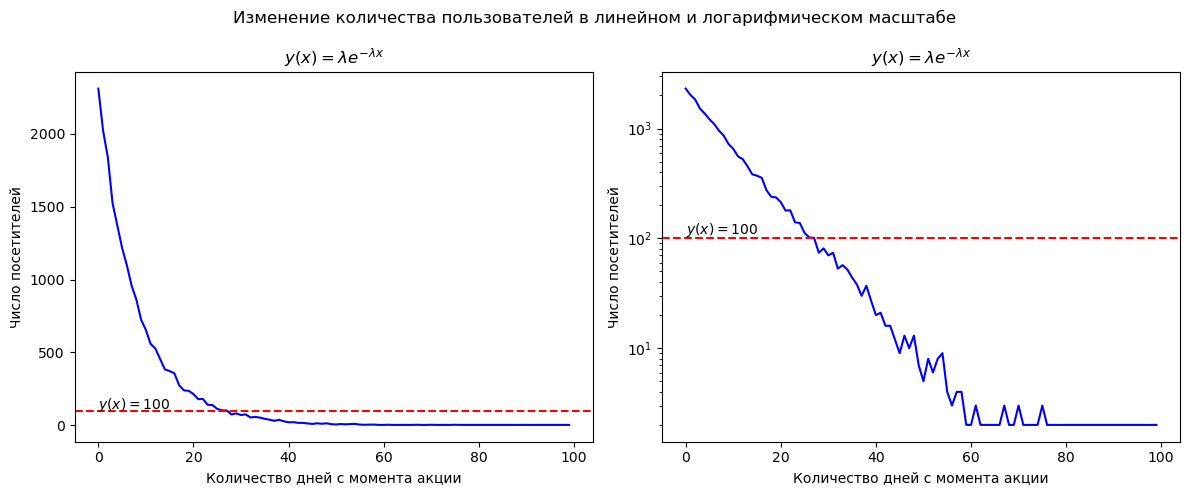

In [24]:
visitors = np.load('visitors.npy')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

days = np.arange(len(visitors))

ax1.plot(days, visitors, 'b-')
ax1.axhline(y=100, color='red', linestyle='--')
ax1.text(0, 110, r'$y(x)=100$')
ax1.set_title(r'$y(x)=\lambda e^{-\lambda x}$')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')

ax2.plot(days, visitors, 'b-')
ax2.axhline(y=100, color='red', linestyle='--')
ax2.text(0, 110, r'$y(x)=100$')
ax2.set_title(r'$y(x)=\lambda e^{-\lambda x}$')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')
ax2.set_yscale('log')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

plt.tight_layout()
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [28]:
reviews = pd.read_csv("reviews_sample.csv", index_col=0)
recipes = pd.read_csv("recipes_sample.csv")

In [29]:
reviews.head()

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [30]:
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [32]:
def classification(minutes):
    if minutes < 5:
        return 'Короткие'
    elif 5 <= minutes < 50:
        return 'Средние'
    else:
        return 'Длинные'

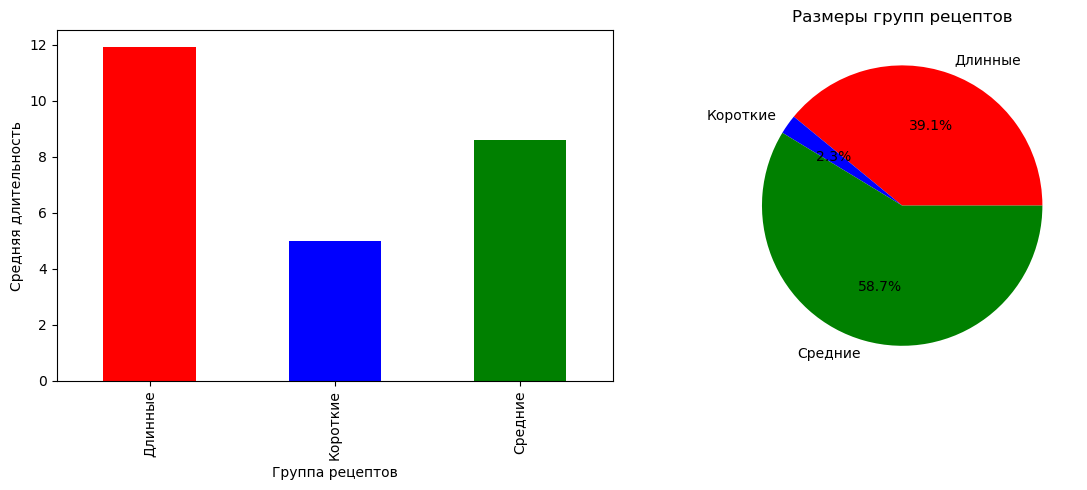

In [60]:
recipes['category'] = recipes['minutes'].apply(classification)

grouped = recipes.groupby('category').agg({'n_steps': 'mean', 'category': 'count'}).rename(columns={'category': 'count'})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
grouped['n_steps'].plot.bar(ax=ax1, color=['red', 'blue', 'green'])
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')

grouped['count'].plot.pie(ax=ax2, labels=grouped.index, colors=['red', 'blue', 'green'], autopct="%1.1f%%", textprops={'color':"black"})
ax2.set_title('Размеры групп рецептов')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

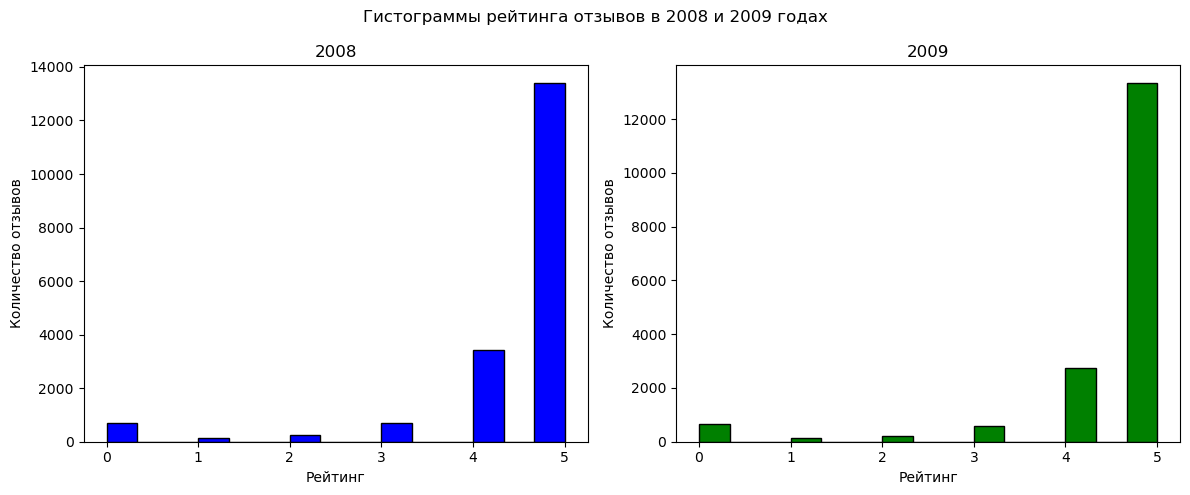

In [91]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'] = reviews['date'].dt.year

reviews_2008 = reviews[reviews['year'] == 2008]
reviews_2009 = reviews[reviews['year'] == 2009]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))



reviews_2008['rating'].plot.hist(ax=ax1, bins=15, color='blue', edgecolor='black')
reviews_2009['rating'].plot.hist(ax=ax2, bins=15, color='green', edgecolor='black')


ax1.set_title('2008')
ax2.set_title('2009')
ax1.set_xlabel('Рейтинг')
ax2.set_xlabel('Рейтинг')
ax1.set_ylabel('Количество отзывов')
ax2.set_ylabel('Количество отзывов')
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

plt.tight_layout()
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

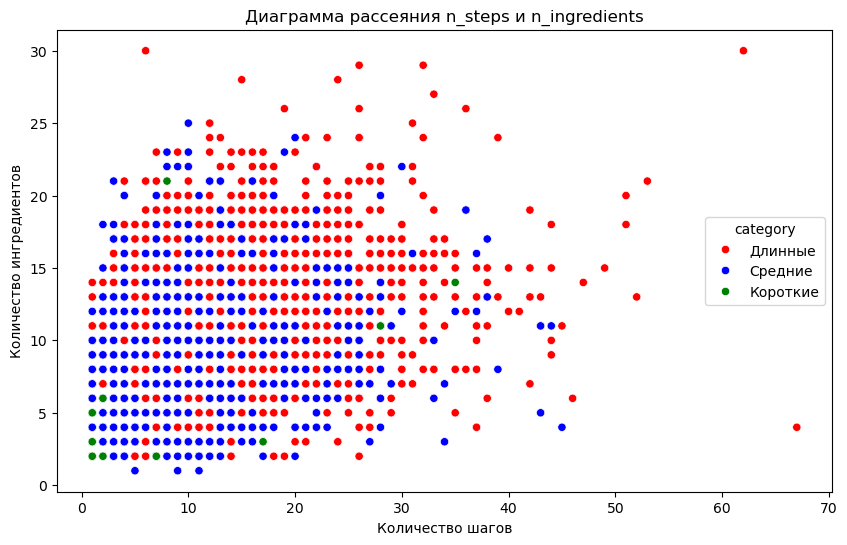

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='category', palette=['red', 'blue', 'green'])
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.xlabel('Количество шагов')
plt.ylabel('Количество ингредиентов')
plt.show()

**Ответ: На диаграмме рассеяния не наблюдается явной линейной зависимости между количеством шагов (`n_steps`) и количеством ингредиентов (`n_ingredients`)**

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

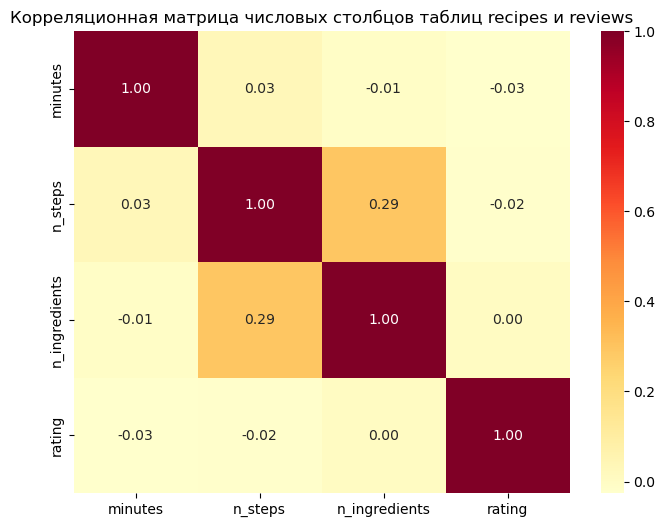

In [73]:
merged = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

corr_matrix = merged[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()